Давайте познакомимся с приближением ряда скользящим средним на примере биржевых котировок акций компании Uniqlo

In [24]:
# импорт библиотек и датасета
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,datetime,timedelta
df = pd.read_csv('uniqlo.csv')


In [3]:
# посмотрим глазами на начало датасета
# можно увидеть, что данные отсортированы в обратном порядке
# кроме того, данных за некоторые дни нет (например, 2016-12-18)
df.head(15)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
5,2016-12-22,43660,43840,43190,43480,381600,16586491000
6,2016-12-21,43900,44370,43610,44000,658900,28994316000
7,2016-12-20,42910,43630,42860,43620,499400,21606102000
8,2016-12-19,42790,43150,42740,43130,358700,15428531000
9,2016-12-16,43350,43550,42810,43130,542000,23380606000


In [4]:
# приведем формата даты к стандарту datetime. 
# это стандартный тип данных, который позволит нам красиво отображать графики по временнЫм осям
# и делать разные операции, например заполнять недостающие данные по дням
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.head(5)


,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [5]:
# переименуем индексы строк в даты
df = df.set_index(pd.DatetimeIndex(df['Date']))
# столбец Date нам больше не нужен, удалим его
df.drop(['Date'], axis =1, inplace = True)
df.head(5)

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,43310,43660,43090,43340,358200,15547803000


In [6]:
# заполним данные по пропущенным дням
# метод resample('d') выполняет группировку данных по дням,
# а ffill заполнит получившиеся пропуски, взяв предыдущее значение вместо пропущенного
df = df.resample('d').ffill()
print(df.isnull().sum()) # проверим, что пропущенных дней больше нет
df.tail(15) # полюбуемся на результат предварительной обработки

Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64


,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-16,43350,43550,42810,43130,542000,23380606000
2016-12-17,43350,43550,42810,43130,542000,23380606000
2016-12-18,43350,43550,42810,43130,542000,23380606000
2016-12-19,42790,43150,42740,43130,358700,15428531000
2016-12-20,42910,43630,42860,43620,499400,21606102000
2016-12-21,43900,44370,43610,44000,658900,28994316000
2016-12-22,43660,43840,43190,43480,381600,16586491000
2016-12-23,43660,43840,43190,43480,381600,16586491000
2016-12-24,43660,43840,43190,43480,381600,16586491000


In [7]:
# создадим отдельный Series для цен открытия биржи
OpenPrice = df.Open
OpenPrice.head()

Date
2012-01-04    14050
2012-01-05    13720
2012-01-06    13990
2012-01-07    13990
2012-01-08    13990
Freq: D, Name: Open, dtype: int64

Нарисуем приближение простым скользящим средним с шириной окна 2

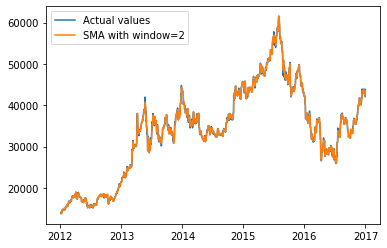

In [8]:
# метод rolling умеет делать скользящие преобразования. 
# Параметр window задает ширину окна, а mean() говорит, что в окне нужно взять среднее арифметическое
result1 = OpenPrice.rolling(window = 2).mean()
# Нарисуем красивый график
plt.plot(OpenPrice,label="Actual values")
plt.plot(result1,label="SMA with window=2")
plt.legend(loc="upper left")
plt.show()

Нарисуем приближение простым скользящим средним с шириной окна 10

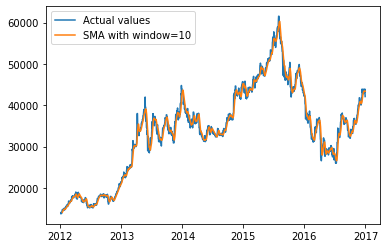

In [9]:
result2 = OpenPrice.rolling(window = 10).mean()
plt.plot(OpenPrice,label="Actual values")
plt.plot(result2,label="SMA with window=10")
plt.legend(loc="upper left")
plt.show()

Нарисуем приближение простым скользящим средним с шириной окна 50.

Можно заметить, что оранжевый график приближения начинается позже графика истинных значений.

Подумайте, почему так получается?

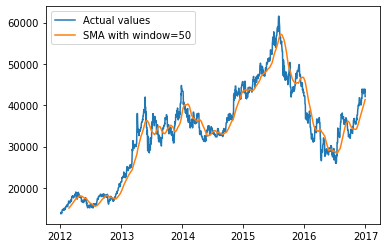

In [10]:
result3 = OpenPrice.rolling(window = 50).mean()
plt.plot(OpenPrice,label="Actual values")
plt.plot(result3,label="SMA with window=50")
plt.legend(loc="upper left")
plt.show()

In [2]:
df1 = pd.read_csv('solarpower_cumuldaybyday2.csv')

In [3]:
df1.drop('Unnamed: 2', axis=1, inplace=True)

In [4]:
df1['date'] = pd.to_datetime(df1['date'], format = r'%d/%m/%Y')

In [5]:
df1 = df1.set_index(pd.DatetimeIndex(df1['date']))

In [6]:
df1.drop('date', axis=1, inplace=True)

In [7]:
df1 = df1.resample('w').ffill()

In [37]:
tidx = pd.date_range('2014-10-05', '2014-10-12', freq='w')

In [38]:
tidx

DatetimeIndex(['2014-10-05', '2014-10-12'], dtype='datetime64[ns]', freq='W-SUN')

In [44]:
df1.loc['2014-10-12'] - df1.loc['2014-10-05']

cum_power    44.0
dtype: float64

In [47]:
df1.iloc[0]

cum_power    34.2
Name: 2011-10-30 00:00:00, dtype: float64

In [53]:
df1.rolling(window = 4).mean().iloc[12]

cum_power    251.075
Name: 2012-01-22 00:00:00, dtype: float64